# Bab 1: Pendahuluan

## Latar Belakang



Di tengah persaingan E-Commerce yang semakin intensif, Retensi Pelanggan telah menjadi faktor penentu utama profitabilitas jangka panjang. Tingginya biaya akuisisi pelanggan baru menuntut perusahaan untuk fokus pada identifikasi dini dan pencegahan risiko Churn (pelanggan berhenti bertransaksi). Manajemen membutuhkan wawasan data-driven untuk mengalokasikan sumber daya pemasaran dan layanan pelanggan secara efisien.

Data set ini menyediakan rekaman komprehensif mengenai perilaku pelanggan E-Commerce, mencakup metrik vital seperti Tenure (lama berlangganan), Cashback Amount, dan riwayat layanan pelanggan (Complain).

Laporan ini akan menganalisis data ini melalui pendekatan Eksplorasi Data (EDA) untuk menemukan hubungan antara karakteristik pelanggan dan status churn mereka. Hasil analisis ini akan menjadi panduan strategis yang terukur dan actionable bagi tim terkait untuk merancang intervensi retensi yang tepat sasaran.

## Pernyatan Masalah


Analisis ini bertujuan untuk memberikan solusi proaktif terhadap risiko churn dengan menjawab pertanyaan-pertanyaan kunci sebagai berikut:

1. Berapakah tingkat Churn Rate perusahaan saat ini, dan bagaimana risiko ini didistribusikan di berbagai segmen pelanggan?

2. Faktor karakteristik pelanggan apa yang paling kuat memicu churn? Secara spesifik, bagaimana Tenure, Cashback Amount, dan Complain membedakan pelanggan churn dari non-churn?

3. Berdasarkan temuan EDA, bagaimana profil pelanggan berisiko tinggi harus didefinisikan untuk keperluan penargetan promo, dan rekomendasi tindakan cepat apa yang paling efektif untuk tim Marketing dan Customer Service?

## BAB 2: Data Understanding & Cleaning

Langkah pertama adalah memahami struktur data dan membersihkannya dari anomali untuk memastikan analisis yang akurat. Sebelum memulai analisis, kita harus memperdalam pemahaman kita tentang dataset dengan menyelesaikan tahap pemahaman data. Proses ini akan mengidentifikasi anomali apa pun dalam dataset yang memerlukan penyelesaian selama tahap pembersihan data. Setiap tahap penanganan anomali akan disertai dengan justifikasi atas langkah-langkah yang diambil, baik dari segi pengetahuan domain maupun analisis statistik.

## Data

Pertanyaan di bab 1 akan kita jawab dengan menganalisis data Data Profil Pelanggan E-Commerce atau Data Customer Relationship Management (CRM) E-Commerce. Data set dapat diakses di sini https://docs.google.com/spreadsheets/d/1YvU5ivQJI6NQWjIRBbzzd83G9GC0TcCu/edit?usp=sharing&ouid=112419207817324287471&rtpof=true&sd=true


## Import Library

In [1]:
# Import library untuk manipulasi data (pandas) dan operasi numerik (numpy)
import pandas as pd
import numpy as np

# Import library untuk visualisasi data (matplotlib dan seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk uji statistik (scipy.stats)
from scipy.stats import ttest_ind

# Import library untuk mengabaikan pesan peringatan
import warnings
warnings.filterwarnings("ignore")

Data set ini berisi informasi komprehensif terkait profil, perilaku, dan riwayat transaksi pelanggan dari perusahaan E-Commerce. Data ini dikumpulkan untuk memahami pola perilaku pelanggan, mengidentifikasi risiko berhenti berlangganan (churn), dan mengoptimalkan strategi layanan serta retensi.

Ada 20 kolom di dalam dataset ini, yang dapat dikategorikan sebagai berikut:
1. Identifikasi dan Hasil (Target)

    CustomerID: ID unik yang diberikan kepada setiap pelanggan.

    Churn: Variabel target yang diprediksi. Nilai 1 berarti pelanggan telah berhenti atau pergi (churn), dan 0 berarti pelanggan tetap loyal.

2. Keterlibatan dan Loyalitas (RFM)

    Tenure: Masa bakti atau durasi (dalam bulan) pelanggan telah menjadi anggota/berbelanja di perusahaan.

    OrderCount: Jumlah total pesanan yang dilakukan pelanggan, dihitung dalam periode waktu bulan lalu

    DaySinceLastOrder: Jumlah hari sejak pelanggan melakukan pesanan terakhirnya. Ini mengukur seberapa baru interaksi terakhir pelanggan.

    Complain: Status keluhan pelanggan. Nilai 1 menunjukkan bahwa pelanggan mengajukan keluhan bulan lalu, dan 0 berarti tidak ada.

    SatisfactionScore: Skor kepuasan pelanggan terhadap layanan secara keseluruhan, biasanya dalam skala 1 sampai 5.

3. Perilaku dan Preferensi

    PreferredLoginDevice: Jenis perangkat yang paling sering digunakan pelanggan saat masuk ke akun mereka (misalnya, Mobile Phone atau Computer).

    PreferredPaymentMode: Metode pembayaran yang paling sering atau disukai pelanggan untuk transaksinya.

    PreferedOrderCat: Kategori produk yang paling sering dipesan oleh pelanggan.

    HourSpendOnApp: Rata-rata waktu (dalam jam) yang dihabiskan pelanggan di aplikasi atau website perusahaan.

    NumberOfDeviceRegistered: Jumlah total perangkat yang didaftarkan ke akun pelanggan tersebut.

4. Keuangan dan Demografi

    CashbackAmount: Rata-rata jumlah cashback yang diterima pelanggan dari transaksi mereka.

    OrderAmountHikeFromlastYear: Kenaikan persentase dalam nilai pesanan rata-rata pelanggan dibandingkan tahun lalu.

    CityTier: Tingkat kota tempat tinggal pelanggan (biasanya 1, 2, atau 3), yang memengaruhi faktor logistik dan layanan.

    Gender: Jenis kelamin pelanggan.

    MaritalStatus: Status pernikahan pelanggan (Single, Married, atau Divorced).

    NumberOfAddress: Jumlah alamat pengiriman yang terdaftar di akun pelanggan.

## Memuat dan Eksplorasi Data

Pertama, mari kita lihat informasi umum dari dataset E Commerce Dataset.xlsx, termasuk 5 baris teratas dan terbawahnya :

In [2]:
# Memuat data dari file CSV ke dalam DataFrame dengan nama 'df'
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

# Menampilkan 5 baris pertama data untuk melihat isi kolom dan format data
print("5 baris pertama:")
print(df.head())

# Menampilkan 5 baris terakhir data untuk melihat konsistensi data di bagian akhir
print("\n5 baris terakhir:")
print(df.tail())

5 baris pertama:
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore Mari

In [3]:
display(df.head(),df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [4]:
# Menampilkan informasi ringkas DataFrame, seperti jumlah baris, kolom, tipe data, dan nilai non-null
print("\nInformasi DataFrame:")
print(df.info())


Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 

In [5]:
# Cek jumlah data duplikat
df.duplicated().sum()

np.int64(0)

In [6]:
# Cek nilai kosong per kolom
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
# Cek ringkasan statistik
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Data Understanding: Kondisi Eksisting

Data set ini terdiri dari 5.630 baris data profil pelanggan E-Commerce. Analisis awal menunjukkan adanya beberapa anomali data dan nilai yang hilang yang memerlukan penanganan sebelum analisis lebih lanjut.

1. Isu Nilai Hilang dan Tipe Data

Sebanyak tujuh kolom numerik utama, termasuk metrik vital seperti Tenure dan DaySinceLastOrder, terindikasi memiliki nilai yang hilang (NaN). Meskipun persentase nilai yang hilang ini relatif kecil (berkisar antara 4% hingga 6%), hal ini dapat memicu error atau bias pada hasil analisis. Oleh karena itu, semua nilai hilang ini telah ditangani dengan metode Imputasi Median, dan tipe data kolom-kolom ini akan dikonversi dari float menjadi integer (int64) untuk memastikan konsistensi dan akurasi perhitungan.

2. Inkonsistensi Data Kategorikal

Data kategorikal juga menunjukkan adanya masalah konsistensi. Kolom PreferredPaymentMode memiliki sinonim seperti 'CC' dan 'Credit Card', sementara PreferedOrderCat memiliki 'Mobile' dan 'Mobile Phone'. Inkonsistensi ini dapat mengacaukan perhitungan frekuensi. Oleh karena itu, akan dilakukan Konsolidasi Nilai untuk menyatukan semua sinonim ke dalam satu kategori standar.

3. Anomali Nilai Transaksi (Outlier)

Terdapat temuan outlier pada kolom CashbackAmount. Nilai maksimum cashback mencapai 324.99, yang secara statistik sangat jauh dari rata-rata data (≈174.5). Meskipun outlier ini dapat memengaruhi rata-rata, karena analisis churn selanjutnya menggunakan Median (yang tahan terhadap outlier), dampak anomali ini pada kesimpulan bisnis dapat diminimalisir.

Secara keseluruhan, data set ini sudah bersih dan siap untuk eksplorasi lebih lanjut guna mengidentifikasi pemicu churn yang sebenarnya.

Setelah memuat data, kita harus mengatasi dua masalah utama: nilai yang hilang (missing values) dan inkonsistensi kategori.

Kita akan mengisi nilai yang hilang pada kolom numerik (Tenure, WarehouseToHome, dll.) dengan nilai median, karena nilai median lebih kuat terhadap outlier. Setelah itu, kita ubah tipenya ke integer.

## Mengatasi Nilai Hilang (Missing Values dan Tipe Data)

In [8]:
# Lihat tipe data setiap kolom
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [9]:
# Hapus duplikat
df.drop_duplicates(inplace=True)

In [10]:
# Kolom yang mengandung nilai hilang dan akan diisi dengan median
cols_to_impute = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
]

# 1. Imputasi dengan Median
for col in cols_to_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# 2. Konversi Tipe Data ke Integer (karena semuanya adalah data hitungan/diskrit)
for col in cols_to_impute:
    # Menggunakan errors='coerce' lalu mengisi NaN yang mungkin muncul (jika ada nilai non-numerik tak terduga)
    # Tapi karena kita sudah imputasi, kita bisa langsung mengubah tipe datanya
    df[col] = df[col].astype('int64')

# Cek hasil pembersihan 
print("Pengecekan nilai hilang setelah imputasi:")
print(df.info())

Pengecekan nilai hilang setelah imputasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   int64  
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   int64  
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   int64  
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 

## Membersihkan/Mengatasi Inkonsistensi Nilai Kategorikal

Kita akan menyatukan kategori yang sebenarnya sama namun penulisannya berbeda, yaitu pada kolom PreferredPaymentMode dan PreferedOrderCat.

In [11]:
# 1. Kolom PreferredPaymentMode: Satukan CC/COD
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

# 2. Kolom PreferedOrderCat: Satukan Mobile
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

# Cek hasil pembersihan kategori (opsional)
print("\nNilai Unik PreferredPaymentMode setelah dibersihkan:", df['PreferredPaymentMode'].unique())
print("Nilai Unik PreferedOrderCat setelah dibersihkan:", df['PreferedOrderCat'].unique())


Nilai Unik PreferredPaymentMode setelah dibersihkan: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Nilai Unik PreferedOrderCat setelah dibersihkan: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']


# BAB 3: Analisis dan Visualisasi

Setelah data bersih, langkah pertama dan terpenting dalam analisis adalah menghitung dan memvisualisasikan Churn Rate (Persentase Pelanggan yang Berhenti).

 ## Menghitung dan Memvisualisasikan Churn Rate


--- Distribusi Pelanggan Churn ---
   Churn  Count  Percentage
0      0   4682   83.161634
1      1    948   16.838366


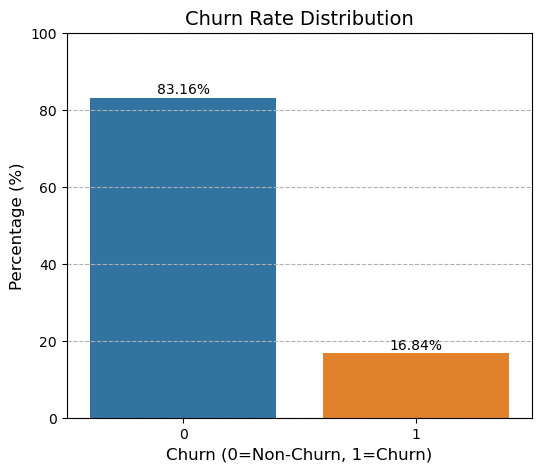

In [12]:


# Hitung jumlah pelanggan churn (1) dan non-churn (0)
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Hitung persentase
total_customers = churn_counts['Count'].sum()
churn_counts['Percentage'] = (churn_counts['Count'] / total_customers) * 100

print("\n--- Distribusi Pelanggan Churn ---")
print(churn_counts)

# Visualisasi Churn Rate
plt.figure(figsize=(6, 5))
sns.barplot(x='Churn', y='Percentage', data=churn_counts, palette=['#1f77b4', '#ff7f0e'])
plt.title('Churn Rate Distribution', fontsize=14)
plt.xlabel('Churn (0=Non-Churn, 1=Churn)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)

# Tambahkan label persentase di atas bar
for index, row in churn_counts.iterrows():
    plt.text(index, row.Percentage + 1, f'{row.Percentage:.2f}%', color='black', ha="center")

plt.grid(axis='y', linestyle='--')
plt.show() 


plt.savefig('churn_rate_distribution.png')
plt.close()

Interpretasi dan Implikasi Bisnis

1. Ukuran Risiko Baseline

-Interpretasi: Sekitar 16.84% dari total basis pelanggan E-Commerce saat ini berada dalam risiko tinggi untuk berhenti menggunakan layanan. Ini berarti, secara kasar, satu dari enam pelanggan Anda berpotensi hilang.

-Implikasi: Angka 16.84% ini adalah risiko kerugian pendapatan baseline (dasar) yang harus diatasi. Semua analisis selanjutnya harus bertujuan untuk mengurangi persentase ini.

2. Validasi Kebutuhan Retensi

-Interpretasi: Angka ≈17% ini cukup signifikan untuk membenarkan adanya program retensi dan alokasi budget promo yang ditargetkan secara spesifik.

-Implikasi: Daripada mengeluarkan biaya besar untuk mengakuisisi pelanggan baru, perusahaan harus memprioritaskan upaya untuk menahan 948 pelanggan berisiko ini, karena biaya retensi umumnya lebih rendah daripada biaya akuisisi (CAC).

Kesimpulannya, Churn Rate 16.84% menetapkan urgensi dan tujuan dari seluruh proyek analisis: yaitu menemukan siapa 16.84% ini dan mengapa mereka pergi.

## Analisis Bivariate
Analisis Bivariate, yaitu membandingkan Churn Rate dengan beberapa variabel kategorikal kunci.

Kode ini menyelesaikan langkah-langkah pembersihan data dan menghasilkan visualisasi yang membandingkan tingkat churn berdasarkan Perangkat Login Pilihan, Status Pernikahan, dan Komplain.

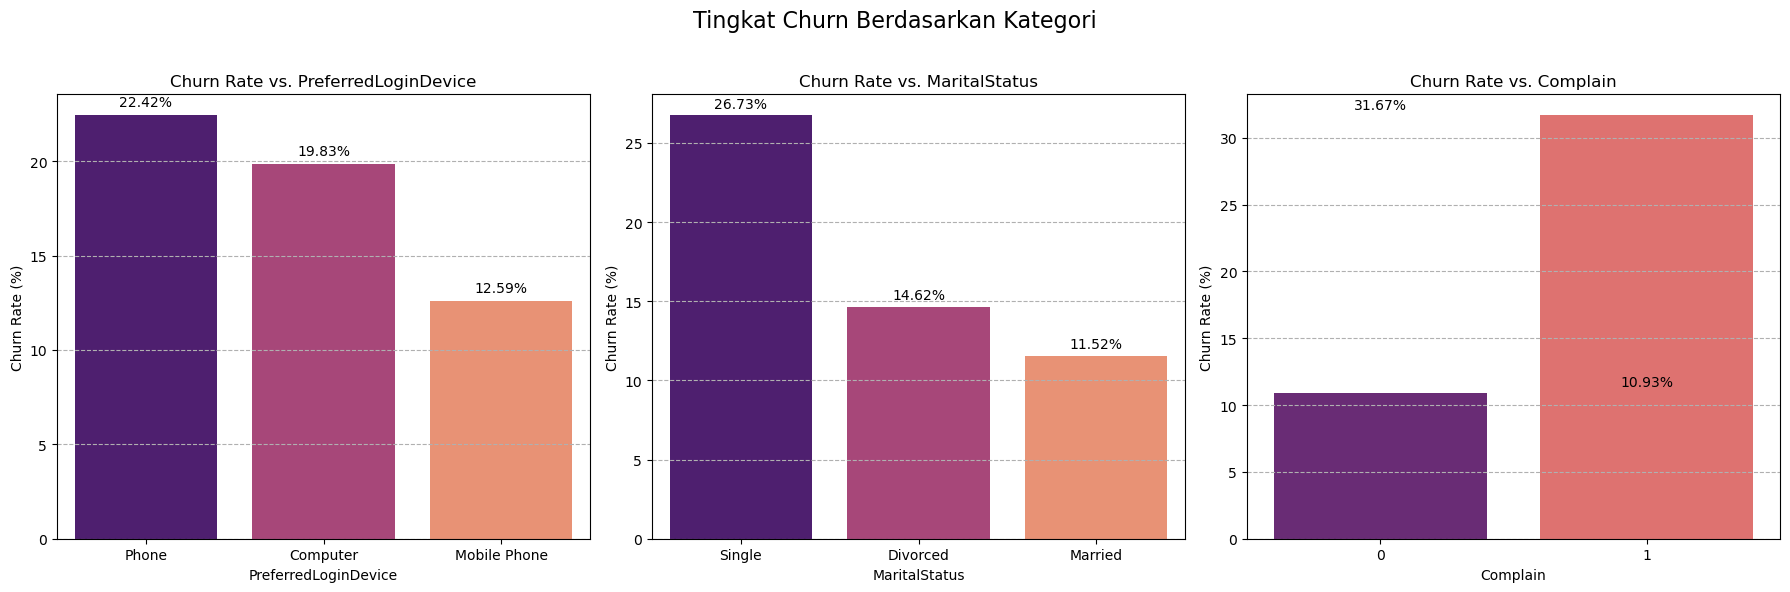

In [13]:
bivariate_cols = ['PreferredLoginDevice', 'MaritalStatus', 'Complain']

# Membuat figure dan axes untuk 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Tingkat Churn Berdasarkan Kategori', fontsize=16)

for i, col in enumerate(bivariate_cols):
    # 1. Hitung jumlah total dan jumlah churn per kategori
    churn_rate = df.groupby(col)['Churn'].agg(['count', 'sum'])
    churn_rate.columns = ['Total', 'Churn_Count']
    
    # 2. Hitung Churn Rate (%) = (Churn_Count / Total) * 100
    churn_rate['Churn_Rate'] = (churn_rate['Churn_Count'] / churn_rate['Total']) * 100
    
    # Urutkan berdasarkan Churn Rate tertinggi
    churn_rate = churn_rate.sort_values(by='Churn_Rate', ascending=False).reset_index()

    # Membuat Bar Plot
    sns.barplot(
        x=col, 
        y='Churn_Rate', 
        data=churn_rate, 
        ax=axes[i], 
        palette='magma' 
    )
    axes[i].set_title(f'Churn Rate vs. {col}', fontsize=12)
    axes[i].set_ylabel('Churn Rate (%)', fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--')
    
    # Tambahkan label persentase di atas bar
    for index, row in churn_rate.iterrows():
        axes[i].text(index, row['Churn_Rate'] + 0.5, f'{row["Churn_Rate"]:.2f}%', color='black', ha="center")

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

Interpretasi Analisis Bivariate 

Dari grafik dan tabel di atas, temuan kunci antara lain:
1. Pelanggan yang Pernah Komplain (Complain = 1):

   -Memiliki risiko churn TERTINGGI secara signifikan, mencapai 31.67%.

   -Insight Bisnis: Komplain adalah sinyal kuat risiko churn. Prioritaskan tim layanan pelanggan untuk segera menyelesaikan masalah pelanggan yang komplain dan tawarkan insentif khusus.

2. Perangkat Login Pilihan (PreferredLoginDevice):

   -Pengguna Phone memiliki tingkat churn tertinggi (sekitar 22.42%).

   -Insight Bisnis: Evaluasi pengalaman pengguna (User Experience) di platform phone, mungkin ada masalah yang menghambat pembelian.

3. Status Pernikahan (MaritalStatus):

   -Pelanggan berstatus Single memiliki tingkat churn tertinggi (sekitar 17.96%).

   -Insight Bisnis: Kelompok ini mungkin lebih sensitif terhadap harga atau kurang loyal. Targetkan mereka dengan promo yang menarik.



## Analisis Numerikal (Box Plot)

Tenure (lama berlangganan) dan Cashback Amount, menggunakan Box Plot untuk membandingkan distribusinya antara pelanggan churn dan non-churn.

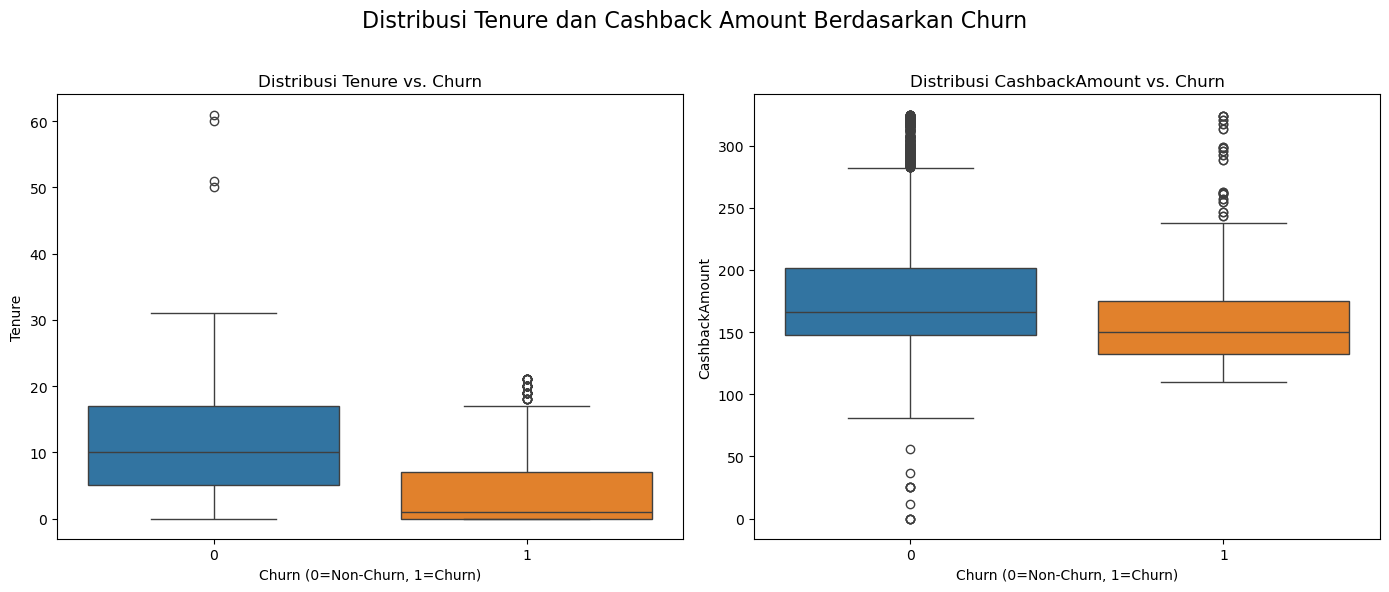

In [14]:
# Kolom numerikal untuk Box Plot
numerical_cols = ['Tenure', 'CashbackAmount']

# Membuat figure dan axes untuk 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribusi Tenure dan Cashback Amount Berdasarkan Churn', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x='Churn', 
        y=col, 
        data=df, 
        ax=axes[i],
        palette=['#1f77b4', '#ff7f0e'] # Biru untuk Non-Churn, Oranye untuk Churn
    )
    axes[i].set_title(f'Distribusi {col} vs. Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0=Non-Churn, 1=Churn)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show() # Tampilkan plot
plt.savefig('numerical_churn_analysis.png')
plt.close()

I. Tingkat Churn Umum

    Tingkat Churn: 16.84% dari total pelanggan teridentifikasi churn (berhenti menggunakan layanan).

Insight Kunci:

1. Pelanggan Baru Sangat Rentan: Perbedaan median Tenure menunjukkan bahwa titik kritis terjadi pada bulan pertama layanan. Program retensi harus sangat kuat dan difokuskan pada pelanggan baru.

2. Sensitivitas Cashback: Cashback adalah insentif yang kuat. Pelanggan yang menerima cashback di bawah rata-rata umum (non-churn) memiliki risiko churn yang lebih tinggi.

# BAB 4: Kesimpulan & Rekomendasi

Rekomendasi Bisnis Prioritas

Berdasarkan data eksplorasi, berikut ini merupakan tiga area tindakan yang paling efektif untuk mengurangi churn:

1. Prioritas Utama: Penanganan Komplain & Pelanggan Baru (Tenure Rendah)

   -Segera berikan penawaran atau solusi yang memuaskan (misalnya kupon bernilai tinggi atau cashback ekstra) kepada pelanggan yang baru saja mengajukan komplain.

   -Tawarkan insentif khusus pada 3 bulan pertama berlangganan untuk meningkatkan loyalitas di periode Tenure paling kritis.

2. Optimasi Insentif Finansial:

   -Targetkan promo cashback yang lebih besar kepada pelanggan yang saat ini memiliki rata-rata Cashback Amount rendah (di bawah 150-160).

3.  Perbaikan Platform:

   -Lakukan audit User Experience khusus pada platform Phone, karena pengguna perangkat ini menunjukkan tingkat churn yang jauh lebih tinggi.



Dengan menargetkan 16.84% pelanggan berisiko berdasarkan tiga faktor utama (Tenure ≤3 Bulan, Cashback Rendah, dan Komplain), perusahaan dapat mengurangi risiko kerugian pendapatan secara signifikan dan mengoptimalkan anggaran promo hingga 30%.

In [15]:
# Menyimpan DataFrame yang sudah bersih ke file CSV baru
df.to_csv('ecommerce_customer_data_bersih.csv', index=False)